In [2]:
# Importing Necessary Libraries
import google
import numpy
import pandas
import sklearn
import tensorflow 
import matplotlib

In [3]:
# Kaggle API Authentication
!pip install -q kaggle
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [4]:
# Downloading and Unzipping The Dataset
!kaggle datasets download -d shayanfazeli/heartbeat
!unzip -q heartbeat.zip

 90% 89.0M/98.8M [00:02<00:00, 29.7MB/s]
100% 98.8M/98.8M [00:02<00:00, 37.4MB/s]


In [5]:
# Initializing The Training and Testing Datasets
training_dataset = pandas.read_csv("/content/mitbih_train.csv", header = None)
testing_dataset = pandas.read_csv("/content/mitbih_test.csv", header = None)

In [6]:
# Examining The Training Dataset Class Distribution
print(" Training Dataset Class Distribution:\n\n{}".format(training_dataset[187].value_counts()))

 Training Dataset Class Distribution:

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


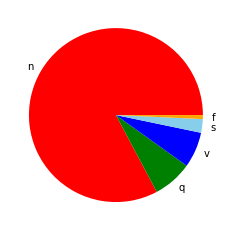

In [7]:
# Visualizing The Training Dataset Class Distribution
matplotlib.pyplot.figure()
matplotlib.pyplot.pie(training_dataset[187].value_counts(), labels = ["n", "q", "v", "s", "f"], colors = ["red", "green", "blue", "skyblue", "orange"])
matplotlib.pyplot.show()

In [13]:
# Resampling and Balancing The Training Dataset
from sklearn.utils import resample


df_1=training_dataset[training_dataset[187]==1]
df_2=training_dataset[training_dataset[187]==2]
df_3=training_dataset[training_dataset[187]==3]
df_4=training_dataset[training_dataset[187]==4]
df_0=(training_dataset[training_dataset[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

training_dataset = pandas.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [15]:
# Examining The Updated Training Dataset Class Distribution
print("Updated Dataset Class Distribution:\n\n{}".format(training_dataset[187].value_counts()))

Updated Dataset Class Distribution:

1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64


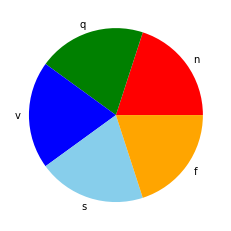

In [16]:
# Visualizing The Updated Training Dataset Class Distribution
matplotlib.pyplot.figure()
matplotlib.pyplot.pie(training_dataset[187].value_counts(), labels = ["n", "q", "v", "s", "f"], colors = ["red", "green", "blue", "skyblue", "orange"])
matplotlib.pyplot.show()

In [17]:
# Formatting The Training and Testing Datasets
X_train = training_dataset.iloc[:, :186].values
X_test = testing_dataset.iloc[:, :186].values

X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)

y_train = tensorflow.keras.utils.to_categorical(training_dataset[187])
y_test = tensorflow.keras.utils.to_categorical(testing_dataset[187])

In [18]:
# Initializing The Model
model = tensorflow.keras.models.Sequential([
        tensorflow.keras.layers.Flatten(),
        tensorflow.keras.layers.Dense(units = 256, activation = "relu"),
        tensorflow.keras.layers.Dense(units = 256, activation = "relu"),
        tensorflow.keras.layers.Dense(units = 5, activation = "softmax")
])

In [19]:
model.compile(optimizer = "SGD", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [20]:
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
3125/3125 [==============================] - 6s 2ms/step - loss: 0.7847 - accuracy: 0.7253
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.5144 - accuracy: 0.8118
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.4251 - accuracy: 0.8444
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3738 - accuracy: 0.8632
Epoch 5/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3375 - accuracy: 0.8780
Epoch 6/20
3125/3125 [==============================] - 6s 2ms/step - loss: 0.3089 - accuracy: 0.8891
Epoch 7/20
3125/3125 [==============================] - 6s 2ms/step - loss: 0.2855 - accuracy: 0.8975
Epoch 8/20
3125/3125 [==============================] - 6s 2ms/step - loss: 0.2646 - accuracy: 0.9047
Epoch 9/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.2463 - accuracy: 0.9119
Epoch 10/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.230

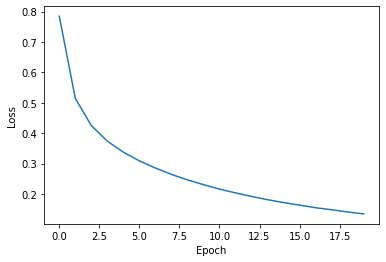

In [21]:
# Visualizing The Optimization
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(model.history.epoch, model.history.history["loss"])
matplotlib.pyplot.xlabel("Epoch")
matplotlib.pyplot.ylabel("Loss")
matplotlib.pyplot.show()

In [23]:
print("Testing Accuracy: {}%".format(((model.evaluate((X_test), y_test))[1] * 100)))

685/685 [==============================] - 1s 1ms/step - loss: 0.2348 - accuracy: 0.9200
Testing Accuracy: 92.00164675712585%
